<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Finding How The Data Is Distributed**


Estimated time needed: **30** minutes


In this lab, you will work with a cleaned dataset to perform Exploratory Data Analysis (EDA). You will examine the structure of the data, visualize key variables, and analyze trends related to developer experience, tools, job satisfaction, and other important aspects.


## Objectives


In this lab you will perform the following:


- Understand the structure of the dataset.

- Perform summary statistics and data visualization.

- Identify trends in developer experience, tools, job satisfaction, and other key variables.


### Install the required libraries


In [13]:
!pip install pandas
!pip install matplotlib
!pip install seaborn

### Step 1: Import Libraries and Load Data


- Import the `pandas`, `matplotlib.pyplot`, and `seaborn` libraries.


- You will begin with loading the dataset. You can use the pyfetch method if working on JupyterLite. Otherwise, you can use pandas' read_csv() function directly on their local machines or cloud environments.


In [14]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Stack Overflow survey dataset
data_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'
df = pd.read_csv(data_url)

# Display the first few rows of the dataset
df.head()

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN


### Step 2: Examine the Structure of the Data


- Display the column names, data types, and summary information to understand the data structure.

- Objective: Gain insights into the dataset's shape and available variables.


In [15]:
print(df.columns)

print(df.dtypes)

df.info()

print(df.describe())

print(df.describe(include=['object']))

Index(['ResponseId', 'MainBranch', 'Age', 'Employment', 'RemoteWork', 'Check',
       'CodingActivities', 'EdLevel', 'LearnCode', 'LearnCodeOnline',
       ...
       'JobSatPoints_6', 'JobSatPoints_7', 'JobSatPoints_8', 'JobSatPoints_9',
       'JobSatPoints_10', 'JobSatPoints_11', 'SurveyLength', 'SurveyEase',
       'ConvertedCompYearly', 'JobSat'],
      dtype='object', length=114)
ResponseId               int64
MainBranch              object
Age                     object
Employment              object
RemoteWork              object
                        ...   
JobSatPoints_11        float64
SurveyLength            object
SurveyEase              object
ConvertedCompYearly    float64
JobSat                 float64
Length: 114, dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB
         ResponseId      CompTotal       WorkExp  JobSatPo

### Step 3: Handle Missing Data


- Identify missing values in the dataset.

- Impute or remove missing values as necessary to ensure data completeness.



In [16]:
missing_percent = (df.isna().sum() / len(df) * 100).sort_values(ascending=False)

threshold = 0.8  # 80% missing
cols_to_drop = missing_percent[missing_percent > threshold*100].index
df.drop(columns=cols_to_drop, inplace=True)

df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)

categorical_cols = ['Frequency_3', 'ProfessionalTech']  # add more if needed
for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

print(df.isna().sum().sort_values(ascending=False).head(20))

/tmp/ipykernel_3577/1157070329.py:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['ConvertedCompYearly'].fillna(df['ConvertedCompYearly'].median(), inplace=True)
/tmp/ipykernel_3577/1157070329.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col]

AINextMuch more integrated       51999
EmbeddedAdmired                  48704
EmbeddedWantToWorkWith           47837
EmbeddedHaveWorkedWith           43223
AIToolNot interested in Using    41023
AINextMore integrated            41009
Knowledge_9                      37802
Knowledge_8                      37679
Knowledge_7                      37659
Knowledge_6                      37573
Knowledge_5                      37557
Knowledge_2                      37416
Knowledge_4                      37407
Knowledge_3                      37342
Frustration                      37186
Frequency_2                      37073
Frequency_1                      37068
ProfessionalCloud                36946
Knowledge_1                      36773
ProfessionalQuestion             36630
dtype: int64


### Step 4: Analyze Key Columns


- Examine key columns such as `Employment`, `JobSat` (Job Satisfaction), and `YearsCodePro` (Professional Coding Experience).

- **Instruction**: Calculate the value counts for each column to understand the distribution of responses.



In [17]:
# Select relevant columns
df_key = df[['Employment', 'JobSat', 'YearsCodePro']].copy()

# Explode Employment if multi-value
df_key['EmploymentList'] = df_key['Employment'].str.split(';')
df_exploded = df_key.explode('EmploymentList')
df_exploded['EmploymentList'] = df_exploded['EmploymentList'].str.strip()

# Count occurrences
employment_counts = df_exploded['EmploymentList'].value_counts()
print("Employment Distribution:\n", employment_counts)

jobsat_counts = df['JobSat'].value_counts().sort_index()
print("\nJob Satisfaction Distribution:\n", jobsat_counts)

df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

yearscode_counts = df['YearsCodePro_numeric'].value_counts().sort_index()
print("\nYears of Professional Coding Experience Distribution:\n", yearscode_counts)

df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

yearscode_counts = df['YearsCodePro_numeric'].value_counts().sort_index()
print("\nYears of Professional Coding Experience Distribution:\n", yearscode_counts)

Employment Distribution:
 EmploymentList
Employed, full-time                                     45162
Independent contractor, freelancer, or self-employed    10726
Student, full-time                                       8626
Employed, part-time                                      4145
Not employed, but looking for work                       3954
Student, part-time                                       2656
Not employed, and not looking for work                   1203
Retired                                                   681
I prefer not to say                                       546
Name: count, dtype: int64

Job Satisfaction Distribution:
 JobSat
0.0      311
1.0      276
2.0      772
3.0     1165
4.0     1130
5.0     1956
6.0     3751
7.0     6379
8.0     7509
9.0     3626
10.0    2251
Name: count, dtype: int64

Years of Professional Coding Experience Distribution:
 YearsCodePro_numeric
1.0     2639
2.0     4168
3.0     4093
4.0     3215
5.0     3526
6.0     2843
7.0     251

### Step 5: Visualize Job Satisfaction (Focus on JobSat)


- Create a pie chart or KDE plot to visualize the distribution of `JobSat`.

- Provide an interpretation of the plot, highlighting key trends in job satisfaction.


/tmp/ipykernel_3577/2743022432.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='JobSat', palette="viridis", order=sorted(df['JobSat'].dropna().unique()))


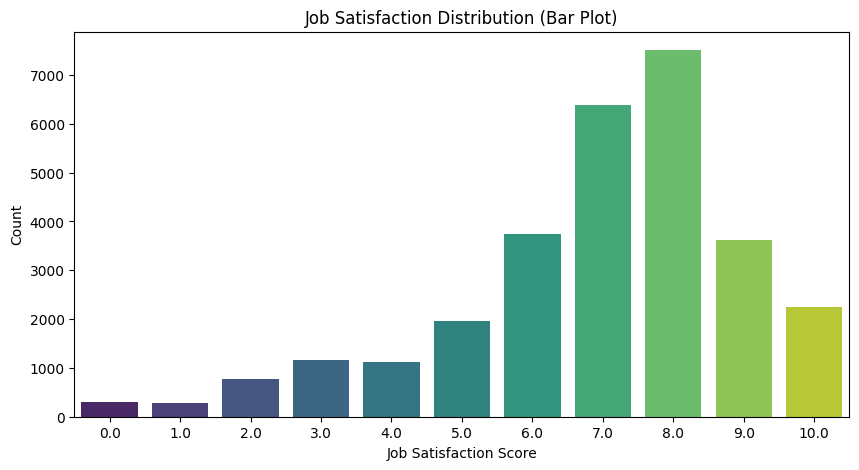

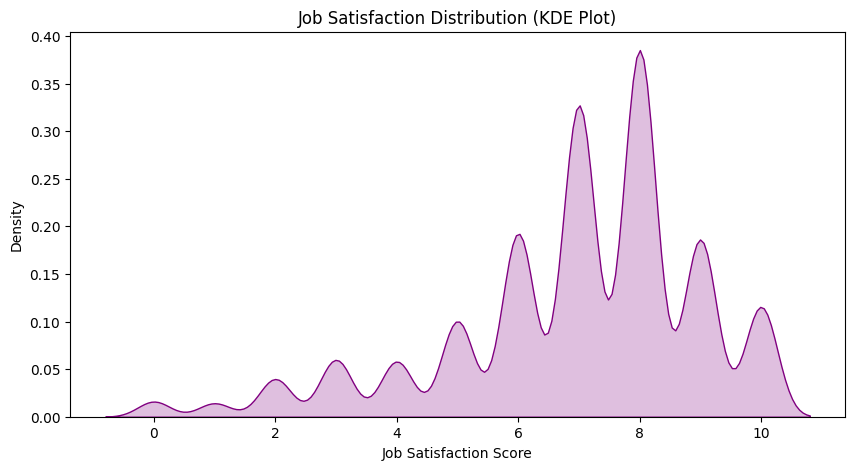

In [19]:
jobsat_counts = df['JobSat'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.countplot(data=df, x='JobSat', palette="viridis", order=sorted(df['JobSat'].dropna().unique()))
plt.title("Job Satisfaction Distribution (Bar Plot)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10,5))
sns.kdeplot(data=df, x='JobSat', fill=True, color='purple')
plt.title("Job Satisfaction Distribution (KDE Plot)")
plt.xlabel("Job Satisfaction Score")
plt.ylabel("Density")
plt.show()

### Step 6: Programming Languages Analysis


- Compare the frequency of programming languages in `LanguageHaveWorkedWith` and `LanguageWantToWorkWith`.
  
- Visualize the overlap or differences using a Venn diagram or a grouped bar chart.


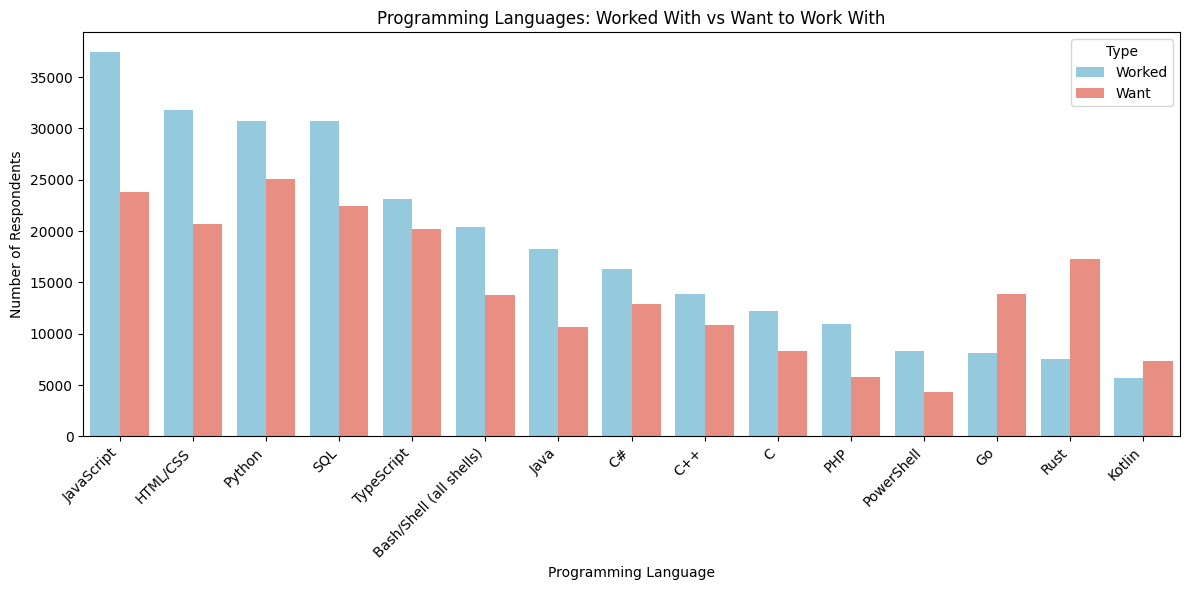

In [21]:
df['WorkedLanguages'] = df['LanguageHaveWorkedWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])
df['WantLanguages'] = df['LanguageWantToWorkWith'].apply(lambda x: x.split(';') if isinstance(x, str) else [])

worked_langs = pd.Series([lang for sublist in df['WorkedLanguages'] for lang in sublist]).value_counts()
want_langs = pd.Series([lang for sublist in df['WantLanguages'] for lang in sublist]).value_counts()

lang_df = pd.DataFrame({'Worked': worked_langs, 'Want': want_langs}).fillna(0)
lang_df = lang_df.sort_values(by='Worked', ascending=False).head(15)  # Top 15 languages

lang_long = lang_df.reset_index().melt(id_vars='index', var_name='Type', value_name='Count')
lang_long.rename(columns={'index': 'Language'}, inplace=True)

plt.figure(figsize=(12,6))
sns.barplot(data=lang_long, x='Language', y='Count', hue='Type', palette=['skyblue','salmon'])
plt.xticks(rotation=45, ha='right')
plt.title("Programming Languages: Worked With vs Want to Work With")
plt.ylabel("Number of Respondents")
plt.xlabel("Programming Language")
plt.legend(title="Type")
plt.tight_layout()
plt.show()

### Step 7: Analyze Remote Work Trends


- Visualize the distribution of RemoteWork by region using a grouped bar chart or heatmap.


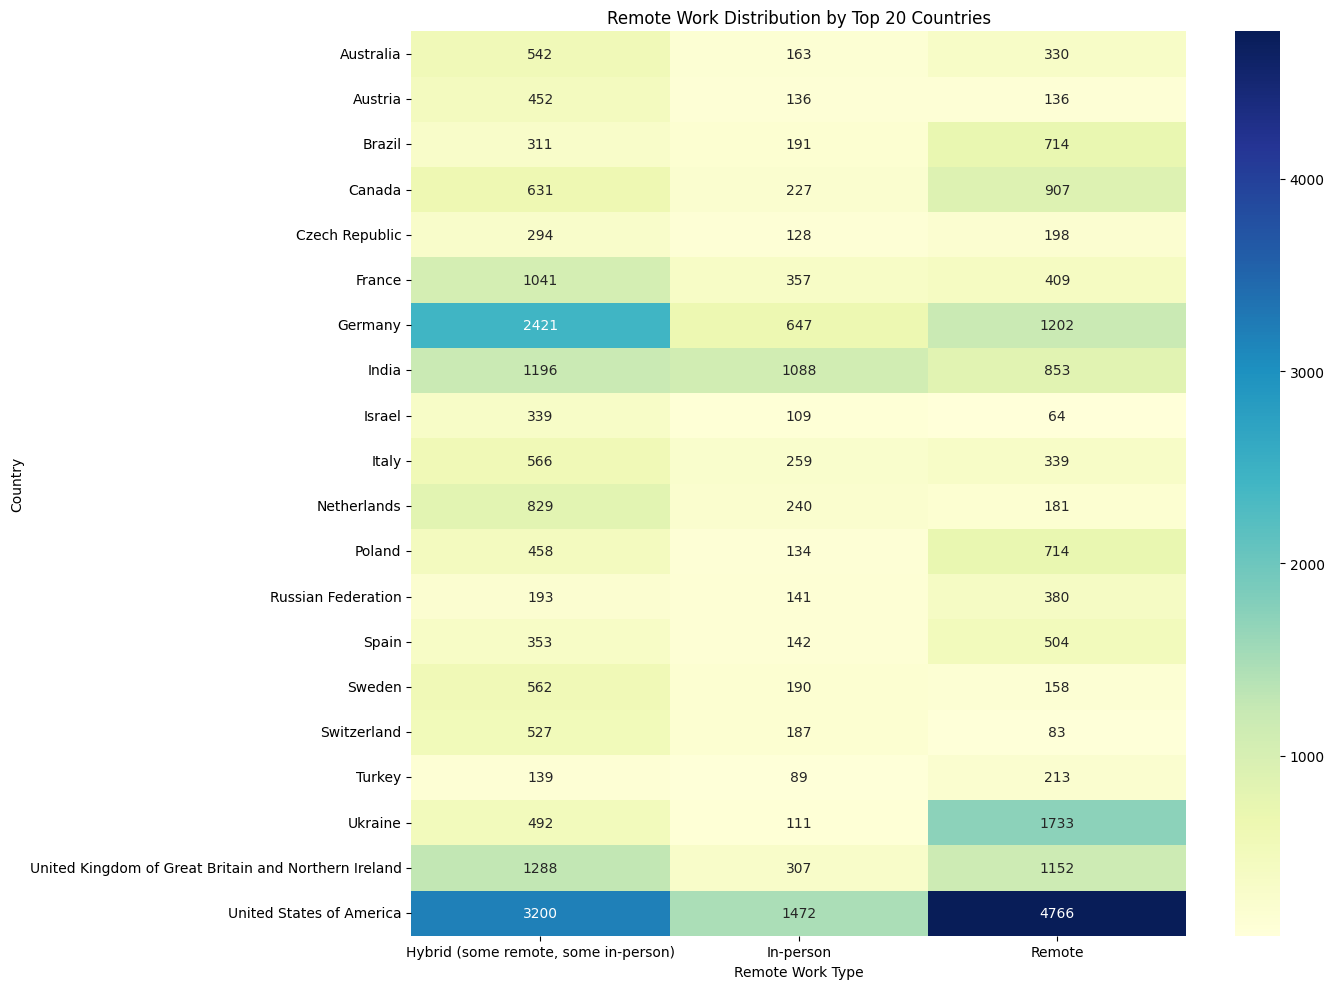

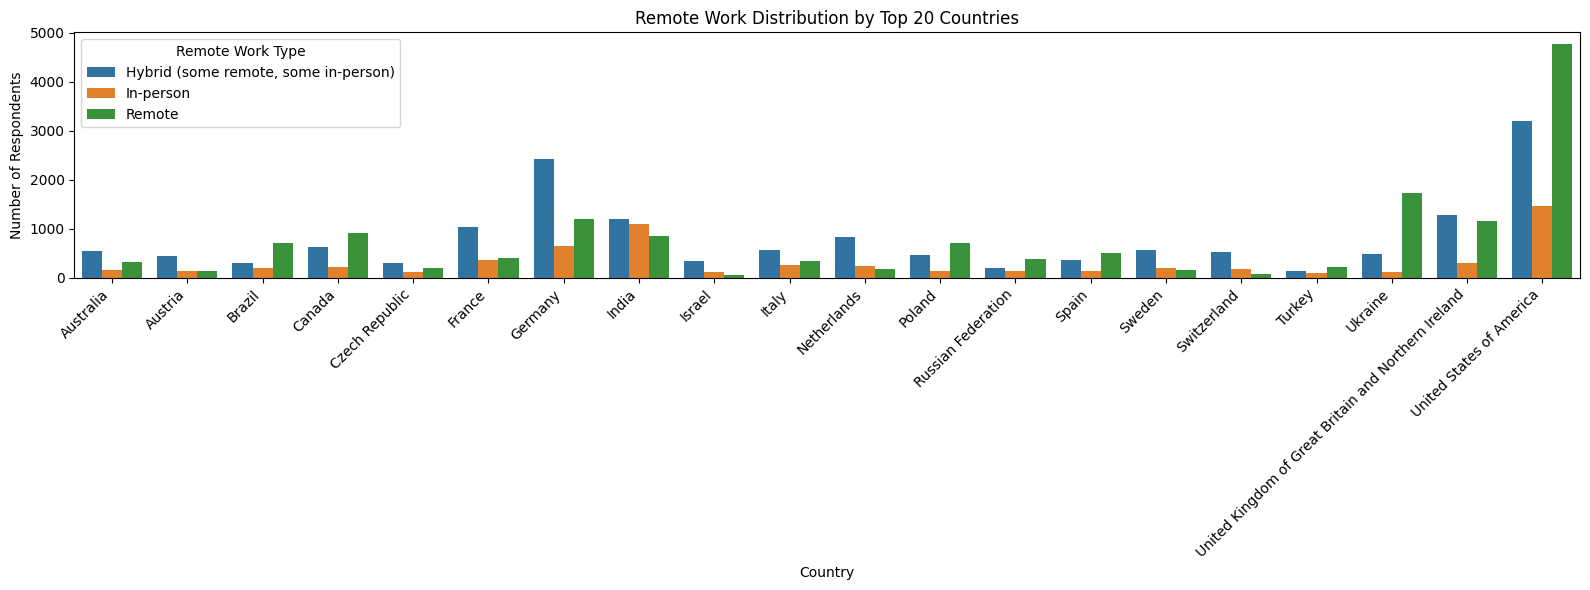

In [23]:
top_countries = df['Country'].value_counts().head(20).index
remote_top = df[df['Country'].isin(top_countries)][['Country', 'RemoteWork']].dropna()

remote_counts = remote_top.groupby(['Country', 'RemoteWork']).size().reset_index(name='Count')
remote_pivot = remote_counts.pivot(index='Country', columns='RemoteWork', values='Count').fillna(0)

plt.figure(figsize=(14,10))
sns.heatmap(remote_pivot, annot=True, fmt='.0f', cmap='YlGnBu')
plt.title("Remote Work Distribution by Top 20 Countries")
plt.ylabel("Country")
plt.xlabel("Remote Work Type")
plt.tight_layout()
plt.show()

plt.figure(figsize=(16,6))
sns.barplot(data=remote_counts, x='Country', y='Count', hue='RemoteWork')
plt.xticks(rotation=45, ha='right')
plt.title("Remote Work Distribution by Top 20 Countries")
plt.ylabel("Number of Respondents")
plt.xlabel("Country")
plt.legend(title="Remote Work Type")
plt.tight_layout()
plt.show()

### Step 8: Correlation between Job Satisfaction and Experience


- Analyze the correlation between overall job satisfaction (`JobSat`) and `YearsCodePro`.
  
- Calculate the Pearson or Spearman correlation coefficient.


Pearson Correlation: 0.103


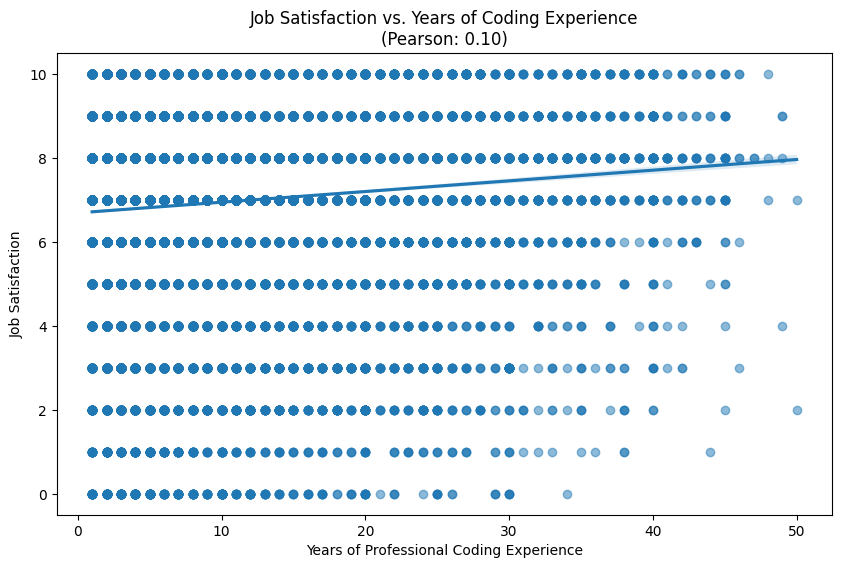

In [25]:
df['YearsCodePro_numeric'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
df_corr = df[['JobSat', 'YearsCodePro_numeric']].dropna()

pearson_corr = df_corr['JobSat'].corr(df_corr['YearsCodePro_numeric'], method='pearson')
print(f"Pearson Correlation: {pearson_corr:.3f}")

plt.figure(figsize=(10,6))
sns.regplot(x='YearsCodePro_numeric', y='JobSat', data=df_corr, scatter_kws={'alpha':0.5})
plt.title(f"Job Satisfaction vs. Years of Coding Experience\n(Pearson: {pearson_corr:.2f})")
plt.xlabel("Years of Professional Coding Experience")
plt.ylabel("Job Satisfaction")
plt.show()

### Step 9: Cross-tabulation Analysis (Employment vs. Education Level)


- Analyze the relationship between employment status (`Employment`) and education level (`EdLevel`).

- **Instruction**: Create a cross-tabulation using `pd.crosstab()` and visualize it with a stacked bar plot if possible.


In [27]:
df['EdLevel'].dropna().unique()

array(['Primary/elementary school',
       'Bachelor’s degree (B.A., B.S., B.Eng., etc.)',
       'Master’s degree (M.A., M.S., M.Eng., MBA, etc.)',
       'Some college/university study without earning a degree',
       'Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)',
       'Professional degree (JD, MD, Ph.D, Ed.D, etc.)',
       'Associate degree (A.A., A.S., etc.)', 'Something else'],
      dtype=object)

Employment_primary                                  Employed, full-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                1260   
Bachelor’s degree (B.A., B.S., B.Eng., etc.)                      19136   
Master’s degree (M.A., M.S., M.Eng., MBA, etc.)                   12489   
Primary/elementary school                                           201   
Professional degree (JD, MD, Ph.D, Ed.D, etc.)                     2312   
Secondary school (e.g. American high school, Ge...                 1860   
Some college/university study without earning a...                 4494   
Something else                                                      448   

Employment_primary                                  Employed, part-time  \
EdLevel                                                                   
Associate degree (A.A., A.S., etc.)                                  39   
Bachelor’s degree (B.A.,

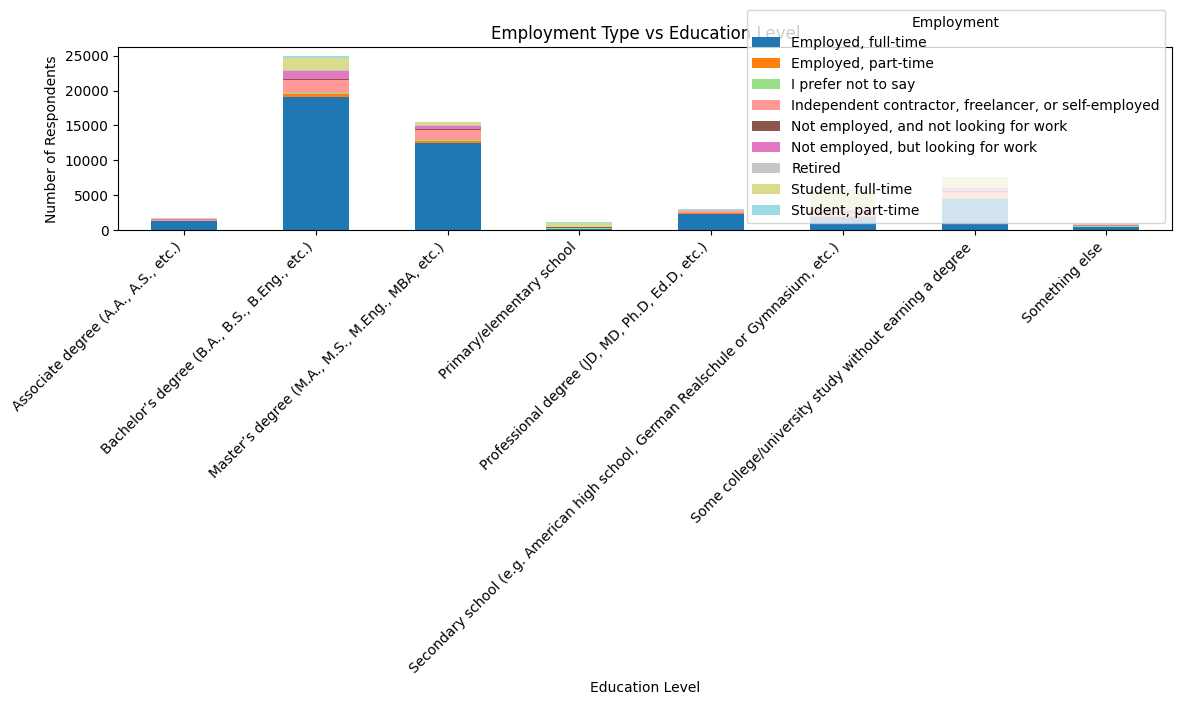

In [26]:
df_sub = df[['Employment', 'EdLevel']].dropna()

df_sub['Employment_primary'] = df_sub['Employment'].apply(lambda x: x.split(';')[0])

employment_edu_ct = pd.crosstab(df_sub['EdLevel'], df_sub['Employment_primary'])

print(employment_edu_ct)

employment_edu_ct.plot(kind='bar', stacked=True, figsize=(12,7), colormap='tab20')
plt.title("Employment Type vs Education Level")
plt.xlabel("Education Level")
plt.ylabel("Number of Respondents")
plt.xticks(rotation=45, ha='right')
plt.legend(title='Employment')
plt.tight_layout()
plt.show()

### Step 10: Export Cleaned Data


- Save the cleaned dataset to a new CSV file for further use or sharing.


In [ ]:
## Write your code here

### Summary:


In this lab, you practiced key skills in exploratory data analysis, including:


- Examining the structure and content of the Stack Overflow survey dataset to understand its variables and data types.

- Identifying and addressing missing data to ensure the dataset's quality and completeness.

- Summarizing and visualizing key variables such as job satisfaction, programming languages, and remote work trends.

- Analyzing relationships in the data using techniques like:
    - Comparing programming languages respondents have worked with versus those they want to work with.
      
    - Exploring remote work preferences by region.

- Investigating correlations between professional coding experience and job satisfaction.

- Performing cross-tabulations to analyze relationships between employment status and education levels.


## Authors:
Ayushi Jain


### Other Contributors:
Rav Ahuja
Lakshmi Holla
Malika


Copyright © IBM Corporation. All rights reserved.
